In [28]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, homogeneity_score, completeness_score, v_measure_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import balanced_accuracy_score, f1_score, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering, AffinityPropagation
from sklearn.cluster import MeanShift, estimate_bandwidth

In [17]:
# Load the breast cancer dataset
data = load_breast_cancer()

# Overview of the data
print("Number of samples:", data['target'].shape[0])
print("Number of dimensions:", data['data'].shape[1])
print("Number of classes:", len(np.unique(data['target'])))
print("Names of classes:", data['target_names'])
print("Number of samples per class:", np.bincount(data['target']))

Number of samples: 569
Number of dimensions: 30
Number of classes: 2
Names of classes: ['malignant' 'benign']
Number of samples per class: [212 357]


# Clustering

In [18]:
# Use KMeans to cluster the data into two clusters
kmeans = KMeans(n_clusters=2)
labels = kmeans.fit_predict(data['data'])

# Evaluate the clustering results
print("Adjusted Rand index:", adjusted_rand_score(data['target'], labels))
print("Homogeneity:", homogeneity_score(data['target'], labels))
print("Completeness:", completeness_score(data['target'], labels))
print("V-Measure:", v_measure_score(data['target'], labels))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adjusted Rand index: 0.49142453622455523
Homogeneity: 0.4222907124699913
Completeness: 0.5168089972809707
V-Measure: 0.46479332792160805


In [20]:
# AffinityPropagation
# Use AffinityPropagation to cluster the data into two clusters
affinity = AffinityPropagation()
labels = affinity.fit_predict(data['data'])

# Evaluate the clustering results
print("Adjusted Rand index:", adjusted_rand_score(data['target'], labels))
print("Homogeneity:", homogeneity_score(data['target'], labels))
print("Completeness:", completeness_score(data['target'], labels))
print("V-Measure:", v_measure_score(data['target'], labels))

Adjusted Rand index: 0.23712032877816283
Homogeneity: 0.6585513540163598
Completeness: 0.21625522475760148
V-Measure: 0.3255923641471126


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


In [21]:
# MeanShift
# Use MeanShift to cluster the data into two clusters
meanshift = MeanShift()
labels = meanshift.fit_predict(data['data'])

# Evaluate the clustering results
print("Adjusted Rand index:", adjusted_rand_score(data['target'], labels))
print("Homogeneity:", homogeneity_score(data['target'], labels))
print("Completeness:", completeness_score(data['target'], labels))
print("V-Measure:", v_measure_score(data['target'], labels))

Adjusted Rand index: 0.5528955767952657
Homogeneity: 0.5024830485311966
Completeness: 0.43379588382762635
V-Measure: 0.4656199570716239


In [22]:
# AgglomerativeClustering
# Use AgglomerativeClustering to cluster the data into two clusters
agglomerative = AgglomerativeClustering(n_clusters=2)
labels = agglomerative.fit_predict(data['data'])

# Evaluate the clustering results
print("Adjusted Rand index:", adjusted_rand_score(data['target'], labels))
print("Homogeneity:", homogeneity_score(data['target'], labels))
print("Completeness:", completeness_score(data['target'], labels))
print("V-Measure:", v_measure_score(data['target'], labels))

Adjusted Rand index: 0.2872456066095377
Homogeneity: 0.26215041159208424
Completeness: 0.40760091453790204
V-Measure: 0.31908185424236946


# Classification

In [29]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['data'], data['target'], test_size=0.2)

# Evaluate all classification methods
for clf in [LinearDiscriminantAnalysis(), LogisticRegression(), DecisionTreeClassifier(), KNeighborsClassifier(), RandomForestClassifier(), AdaBoostClassifier(), GaussianNB()]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, "Accuracy:", accuracy_score(y_test, y_pred))
    print(clf.__class__.__name__, "F1-score:", f1_score(y_test, y_pred))
    print(clf.__class__.__name__, "ROC AUC:", roc_auc_score(y_test, y_pred))

LinearDiscriminantAnalysis Accuracy: 0.9385964912280702
LinearDiscriminantAnalysis F1-score: 0.9496402877697842
LinearDiscriminantAnalysis ROC AUC: 0.9309462915601023
LogisticRegression Accuracy: 0.9298245614035088
LogisticRegression F1-score: 0.943661971830986
LogisticRegression ROC AUC: 0.9165601023017902
DecisionTreeClassifier Accuracy: 0.9210526315789473
DecisionTreeClassifier F1-score: 0.9352517985611511
DecisionTreeClassifier ROC AUC: 0.9127237851662404


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNeighborsClassifier Accuracy: 0.9298245614035088
KNeighborsClassifier F1-score: 0.9420289855072465
KNeighborsClassifier ROC AUC: 0.9235933503836318
RandomForestClassifier Accuracy: 0.9473684210526315
RandomForestClassifier F1-score: 0.9571428571428572
RandomForestClassifier ROC AUC: 0.9382992327365729
AdaBoostClassifier Accuracy: 0.9649122807017544
AdaBoostClassifier F1-score: 0.9710144927536232
AdaBoostClassifier ROC AUC: 0.9600383631713555
GaussianNB Accuracy: 0.9473684210526315
GaussianNB F1-score: 0.9577464788732395
GaussianNB ROC AUC: 0.9347826086956521


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


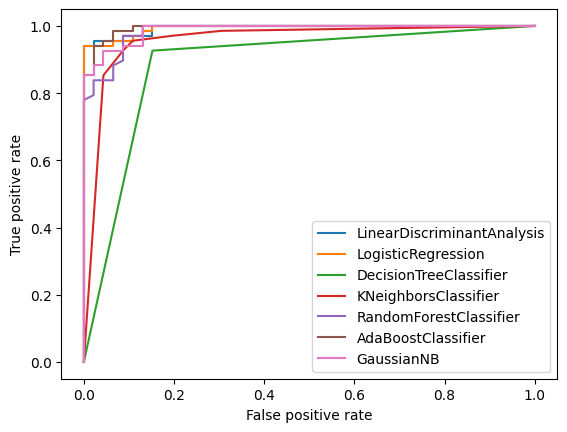

In [30]:
for clf in [LinearDiscriminantAnalysis(), LogisticRegression(), DecisionTreeClassifier(), KNeighborsClassifier(), RandomForestClassifier(), AdaBoostClassifier(), GaussianNB()]:
    clf.fit(X_train, y_train)
    y_score = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    plt.plot(fpr, tpr, label=clf.__class__.__name__)

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()